In [ ]:
# CE652 Assignment 1

In [1]:
import pandas as pd

# --- Taxi Trip Records File Information ---
# taxi_id.csv.bz2: Records the origin and destination of taxi trips with timestamps.
# Columns:
#   taxi_id: Unique identifier for each taxi
#   pick_up_time: Timestamp for passenger pick-up
#   drop_off_time: Timestamp for passenger drop-off
#   pick_up_intersection: Intersection where the trip began
#   drop_off_intersection: Intersection where the trip ended

# Read the large compressed CSV file, add column names if needed
taxi_columns = [
    "taxi_id", "pick_up_time", "drop_off_time", "pick_up_intersection", "drop_off_intersection"
]
taxi_df = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\taxi_id.csv.bz2',
    compression='bz2',
    nrows=10,
    header=None,         # If your CSV has no header
    names=taxi_columns
)
print("########### Taxi Trip Records ###########")
print(taxi_df)

# --- Read three Excel files ---
intersection_to_zone_df = pd.read_csv(r'C:\Users\justi\Downloads\CE634\CE634\intersection_to_zone.csv')
print("\n########### Intersection to Zone (first 10 rows) ###########")
print(intersection_to_zone_df.head(10))

intersections_df = pd.read_csv(r'C:\Users\justi\Downloads\CE634\CE634\intersections.csv')
print("\n########### Intersections (first 10 rows) ###########")
print(intersections_df.head(10))

roads_df = pd.read_csv(r'C:\Users\justi\Downloads\CE634\CE634\roads.csv')
print("\n########### Roads (first 10 rows) ###########")
print(roads_df.head(10))

########### Taxi Trip Records ###########
   taxi_id  pick_up_time  drop_off_time  pick_up_intersection  \
0        1    1293840000     1293840848                   952   
1        2    1293840001     1293840523                  1372   
2        3    1293840003     1293840276                   856   
3        4    1293840004     1293840299                  2060   
4        5    1293840007     1293841159                  2506   
5        6    1293840009     1293840573                   696   
6        7    1293840010     1293840270                  2150   
7        9    1293840013     1293840118                  1669   
8       10    1293840013     1293840140                  1215   
9       11    1293840013     1293840165                  1223   

   drop_off_intersection  
0                   2021  
1                   2815  
2                   1149  
3                   1956  
4                   1332  
5                   1639  
6                   2391  
7                   1545  

In [2]:
import pandas as pd

# --- Load the taxi trip dataset (full, not nrows-limited) ---
taxi_columns = [
    "taxi_id", "pick_up_time", "drop_off_time", "pick_up_intersection", "drop_off_intersection"]
taxi_df = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\taxi_id.csv.bz2',
    compression='bz2',
    header=None,        # Remove if the CSV has a header
    names=taxi_columns
)

# Q1: Unique taxis and number of trips
unique_taxis = taxi_df["taxi_id"].nunique()
num_trips = len(taxi_df)
print(f"Q1: There are {unique_taxis} unique taxis and {num_trips} trips in this dataset.")

# Q2: Distribution of trips per taxi & top performers
trips_per_taxi = taxi_df["taxi_id"].value_counts()
print("Q2: Distribution of trips per taxi (first 10 shown):")
print(trips_per_taxi.head(10))

# Top performers (taxis with most trips)
top_performers = trips_per_taxi.head(10)
print("Top 10 taxis by number of trips:")
print(top_performers)

Q1: There are 13385 unique taxis and 147800095 trips in this dataset.
Q2: Distribution of trips per taxi (first 10 shown):
4816    22842
3341    20859
914     20684
2543    20135
2159    20098
8013    20040
2761    19938
3558    19826
462     19611
7112    19528
Name: taxi_id, dtype: int64
Top 10 taxis by number of trips:
4816    22842
3341    20859
914     20684
2543    20135
2159    20098
8013    20040
2761    19938
3558    19826
462     19611
7112    19528
Name: taxi_id, dtype: int64


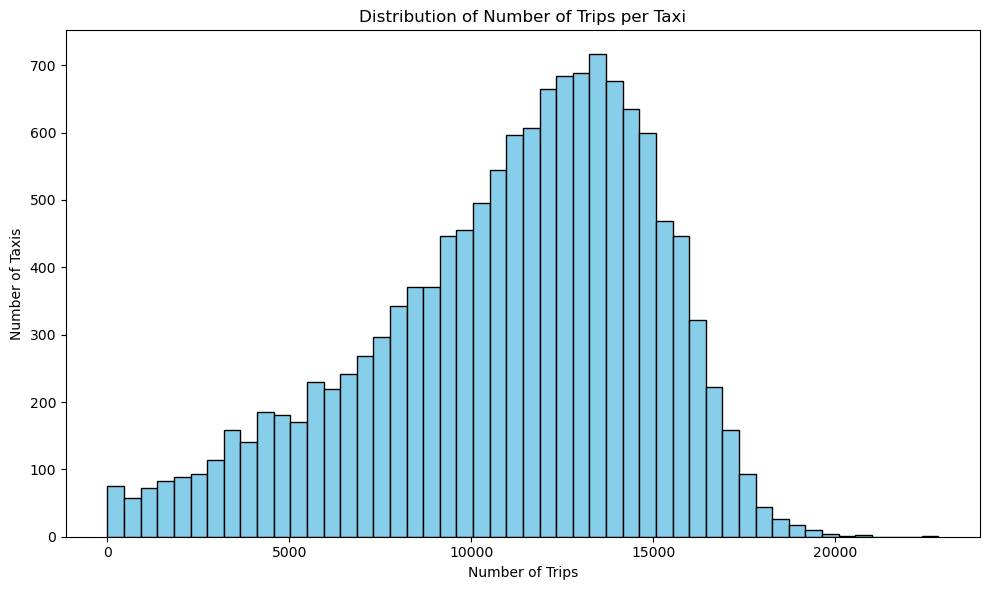

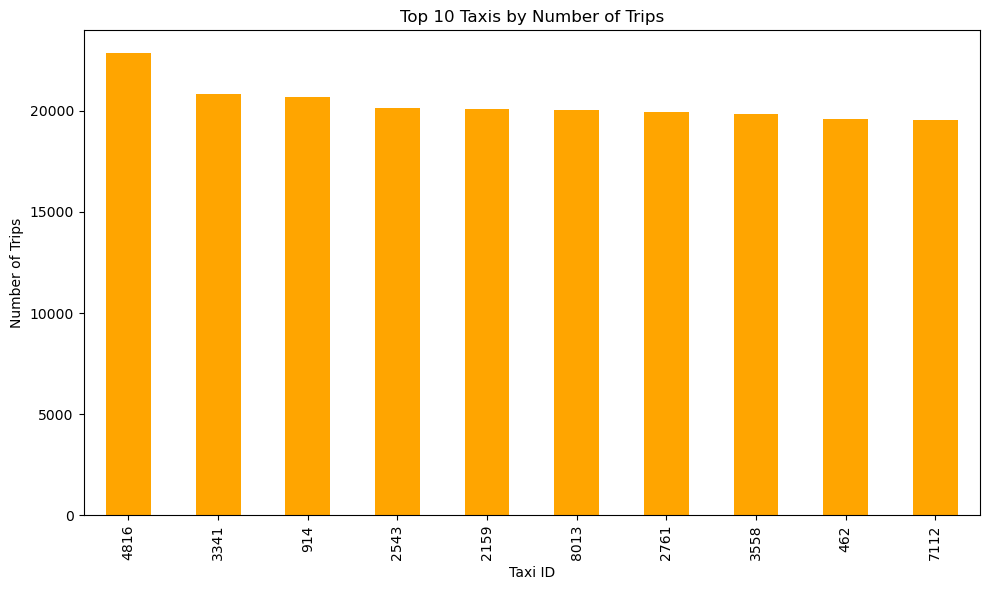

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load complete taxi trip data
columns = ["taxi_id", "pick_up_time", "drop_off_time", "pick_up_intersection", "drop_off_intersection"]
df = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\taxi_id.csv.bz2',
    compression='bz2',
    header=None,        # Remove if your CSV has a header
    names=columns
)

# Distribution of trips per taxi
trips_per_taxi = df['taxi_id'].value_counts()

# Figure 1: Histogram of trips per taxi
plt.figure(figsize=(10, 6))
plt.hist(trips_per_taxi, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Trips per Taxi')
plt.xlabel('Number of Trips')
plt.ylabel('Number of Taxis')
plt.grid(False)
plt.tight_layout()
plt.show()

# Figure 2: Bar plot of top 10 taxis with the most trips
top_taxis = trips_per_taxi.head(10)
plt.figure(figsize=(10, 6))
top_taxis.plot(kind='bar', color='orange')
plt.title('Top 10 Taxis by Number of Trips')
plt.xlabel('Taxi ID')
plt.ylabel('Number of Trips')
plt.grid(False)
plt.tight_layout()
plt.show()

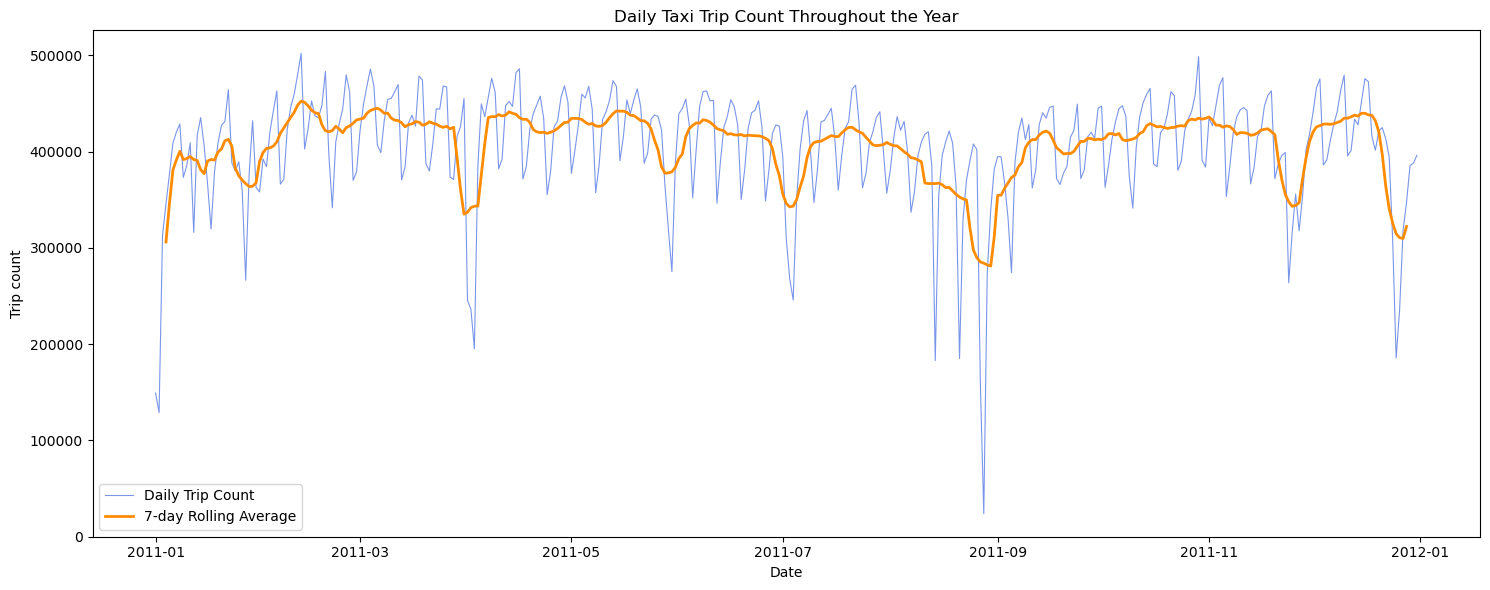

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
columns = ["taxi_id", "pick_up_time", "drop_off_time", "pick_up_intersection", "drop_off_intersection"]
df = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\taxi_id.csv.bz2',
    compression='bz2',
    header=None,        # Remove if your CSV has a header row
    names=columns
)

# Convert pick_up_time from unix timestamp to pandas datetime
df['pick_up_time'] = pd.to_datetime(df['pick_up_time'], unit='s')

# Create a 'date' column for daily aggregation
df['date'] = df['pick_up_time'].dt.date

# Aggregate trips per day
daily_counts = df.groupby('date').size()

# Optionally: Calculate weekly rolling mean to show seasonality/rhythm
weekly_avg = daily_counts.rolling(window=7, center=True).mean()

plt.figure(figsize=(15, 6))
plt.plot(daily_counts.index, daily_counts.values, label='Daily Trip Count', color='royalblue', linewidth=0.8, alpha=0.7)
plt.plot(weekly_avg.index, weekly_avg.values, label='7-day Rolling Average', color='darkorange', linewidth=2)
plt.title('Daily Taxi Trip Count Throughout the Year')
plt.xlabel('Date')
plt.ylabel('Trip count')
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()


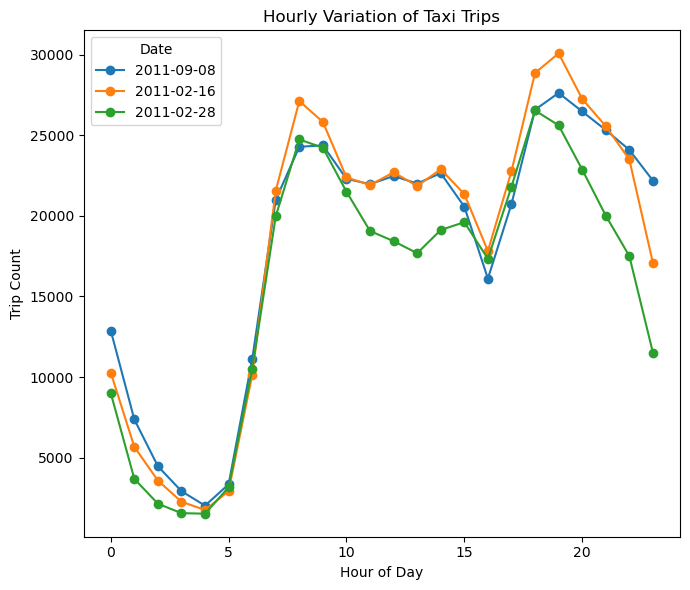

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load trip data
columns = ["taxi_id", "pick_up_time", "drop_off_time", "pick_up_intersection", "drop_off_intersection"]
df = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\taxi_id.csv.bz2',
    compression='bz2',
    header=None,
    names=columns
)

# Convert timestamps from UNIX seconds to datetime
df['pick_up_time'] = pd.to_datetime(df['pick_up_time'], unit='s')
df['date'] = df['pick_up_time'].dt.date
df['hour'] = df['pick_up_time'].dt.hour

# Select three random dates
random_dates = np.random.choice(df['date'].unique(), size=3, replace=False)

plt.figure(figsize=(7,6))
for rd in random_dates:
    hourly_counts = df[df['date'] == rd].groupby('hour').size()
    plt.plot(hourly_counts.index, hourly_counts.values, marker='o', label=str(rd))

# Compose subtitle with exact dates selected
dates_str = ', '.join([str(d) for d in random_dates])
plt.title('Hourly Variation of Taxi Trips')
#plt.suptitle(f'Randomly Selected Dates: {dates_str}', fontsize=10, y=0.92)
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.legend(title='Date')
plt.grid(False)
plt.tight_layout()
plt.show()

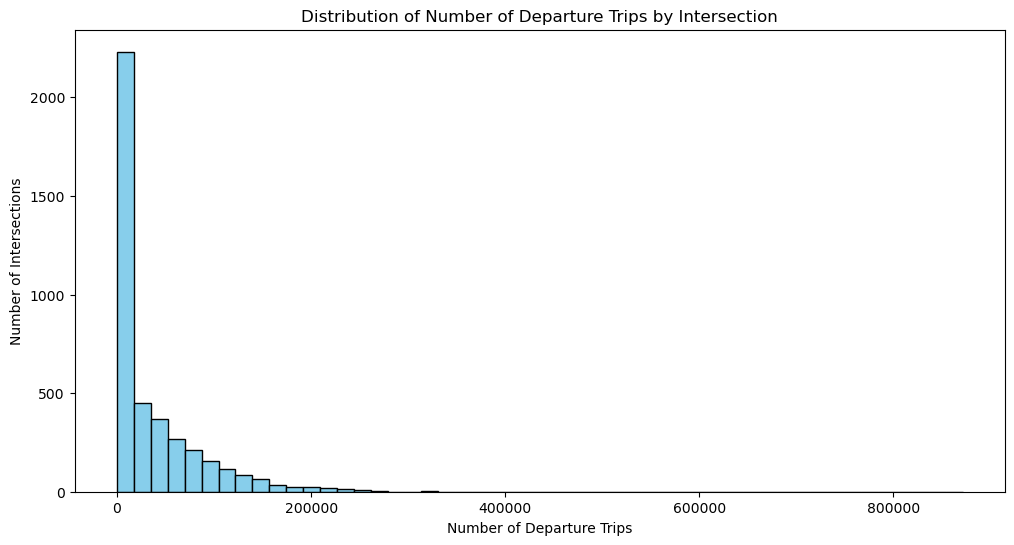

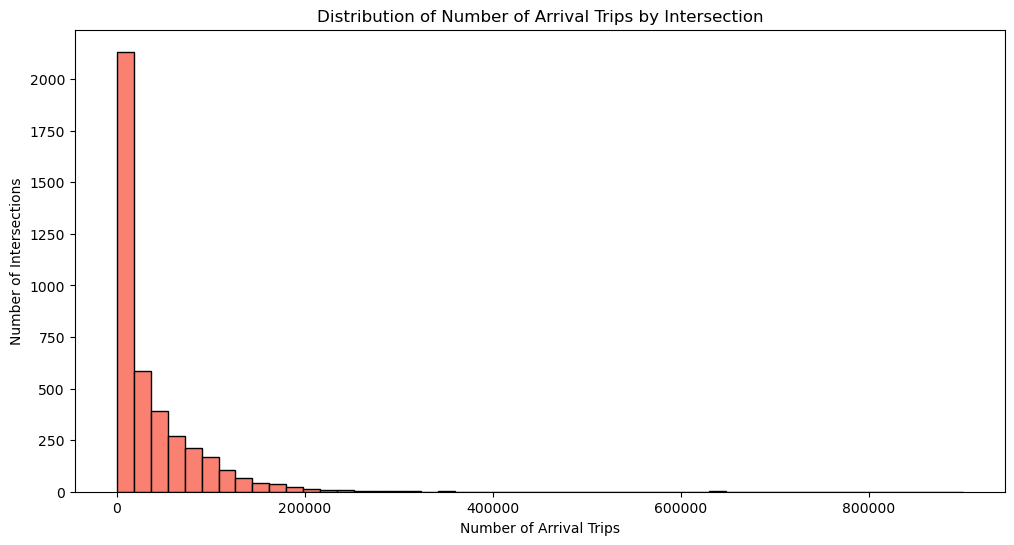

Number of unique departure intersections: 4090
Number of unique arrival intersections: 4091
Max departure trips at a single intersection: 871109
Max arrival trips at a single intersection: 899678


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load taxi trip dataset fully (depending on size, adjust or sample)
taxi_columns = [
    "taxi_id", "pick_up_time", "drop_off_time", "pick_up_intersection", "drop_off_intersection"
]

taxi_df = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\taxi_id.csv.bz2',
    compression='bz2',
    header=None,
    names=taxi_columns
)

# Calculate departure trip distribution by intersection
departure_counts = taxi_df['pick_up_intersection'].value_counts()

# Calculate arrival trip distribution by intersection
arrival_counts = taxi_df['drop_off_intersection'].value_counts()

# Plot distribution of departure trips
plt.figure(figsize=(12,6))
departure_counts.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Departure Trips by Intersection')
plt.xlabel('Number of Departure Trips')
plt.ylabel('Number of Intersections')
plt.grid(False)
plt.show()

# Plot distribution of arrival trips
plt.figure(figsize=(12,6))
arrival_counts.plot(kind='hist', bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Number of Arrival Trips by Intersection')
plt.xlabel('Number of Arrival Trips')
plt.ylabel('Number of Intersections')
plt.grid(False)
plt.show()

# Print basic stats for insight
print(f"Number of unique departure intersections: {departure_counts.size}")
print(f"Number of unique arrival intersections: {arrival_counts.size}")
print(f"Max departure trips at a single intersection: {departure_counts.max()}")
print(f"Max arrival trips at a single intersection: {arrival_counts.max()}")

# Conclusion: Departure and arrival distributions likely skewed,
# with few intersections having many trips while most have fewer.
# This suggests spatial concentration of taxi activity (hotspots).


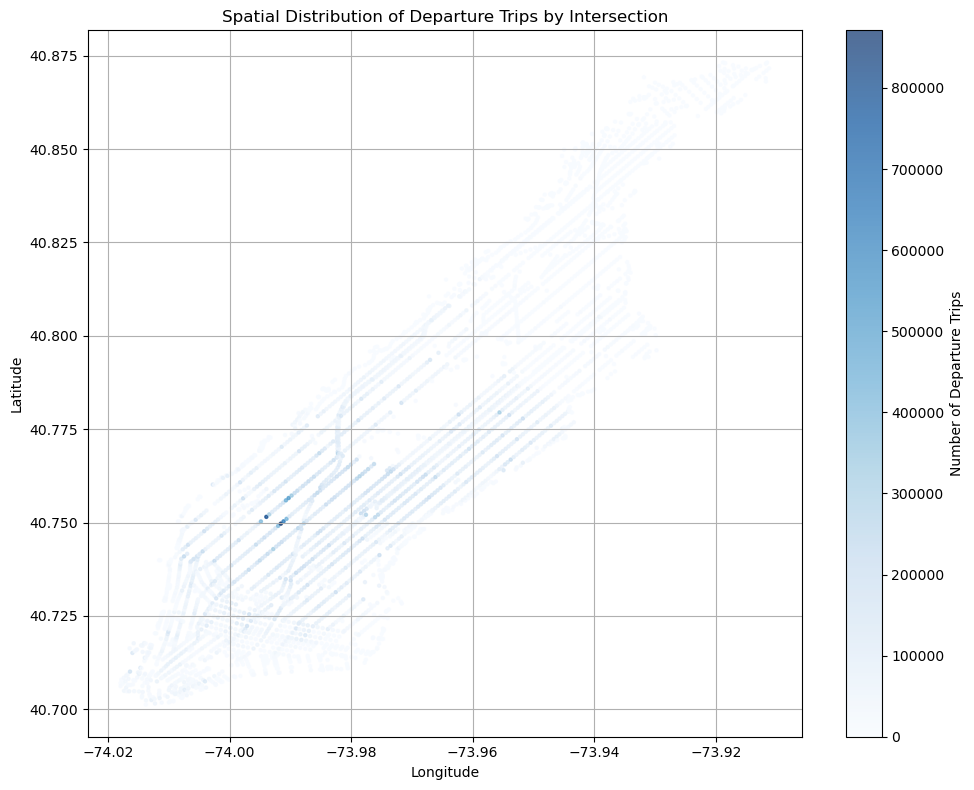

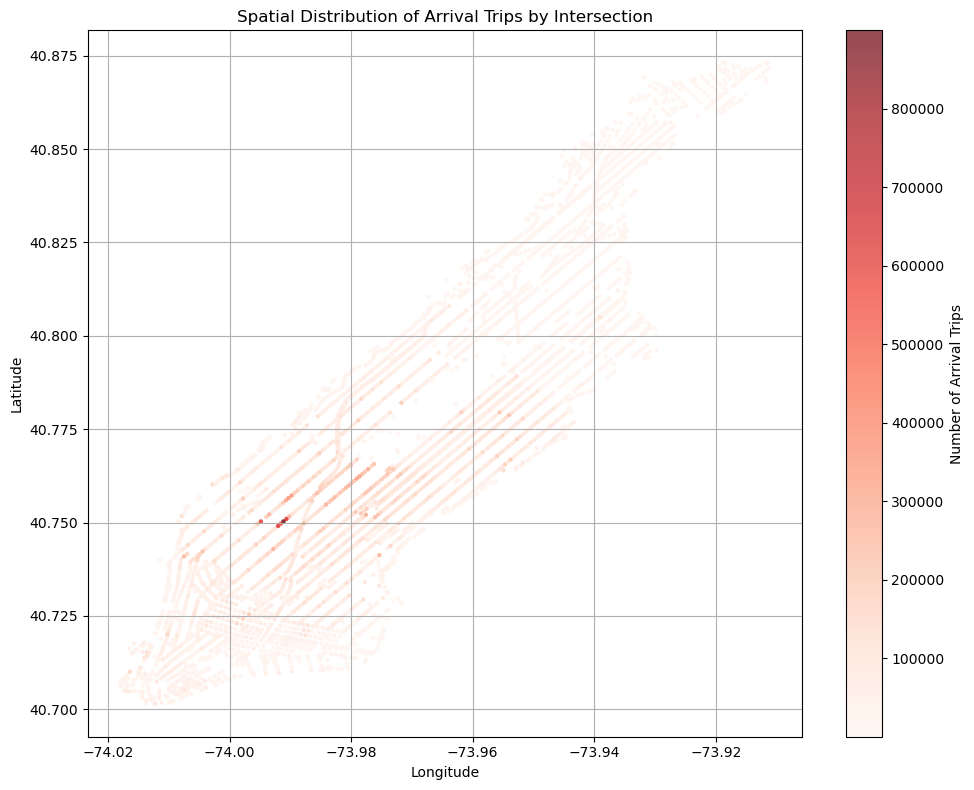

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# ----- Load data -----
taxi_columns = [
    "taxi_id", "pick_up_time", "drop_off_time", "pick_up_intersection", "drop_off_intersection"
]
taxi_df = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\taxi_id.csv.bz2',
    compression='bz2',
    header=None,
    names=taxi_columns
)

# Intersection file might not have headers; so set manually
# Assumed format: inter_id, lat, lon
intersection_df = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\intersections.csv',
    header=None,
    names=['inter_id', 'lat', 'lon']
)

# --- Compute trip counts per intersection ---
departure_counts = taxi_df['pick_up_intersection'].value_counts().rename('departures')
arrival_counts = taxi_df['drop_off_intersection'].value_counts().rename('arrivals')

# --- Merge trip counts with intersection coordinates ---
map_df = intersection_df.set_index('inter_id').join(departure_counts).join(arrival_counts).fillna(0)

# ----- Plot departures -----
plt.figure(figsize=(10,8))
plt.scatter(map_df['lon'], map_df['lat'], c=map_df['departures'], cmap='Blues', s=5, alpha=0.7)
plt.colorbar(label='Number of Departure Trips')
plt.title('Spatial Distribution of Departure Trips by Intersection')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# ----- Plot arrivals -----
plt.figure(figsize=(10,8))
plt.scatter(map_df['lon'], map_df['lat'], c=map_df['arrivals'], cmap='Reds', s=5, alpha=0.7)
plt.colorbar(label='Number of Arrival Trips')
plt.title('Spatial Distribution of Arrival Trips by Intersection')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


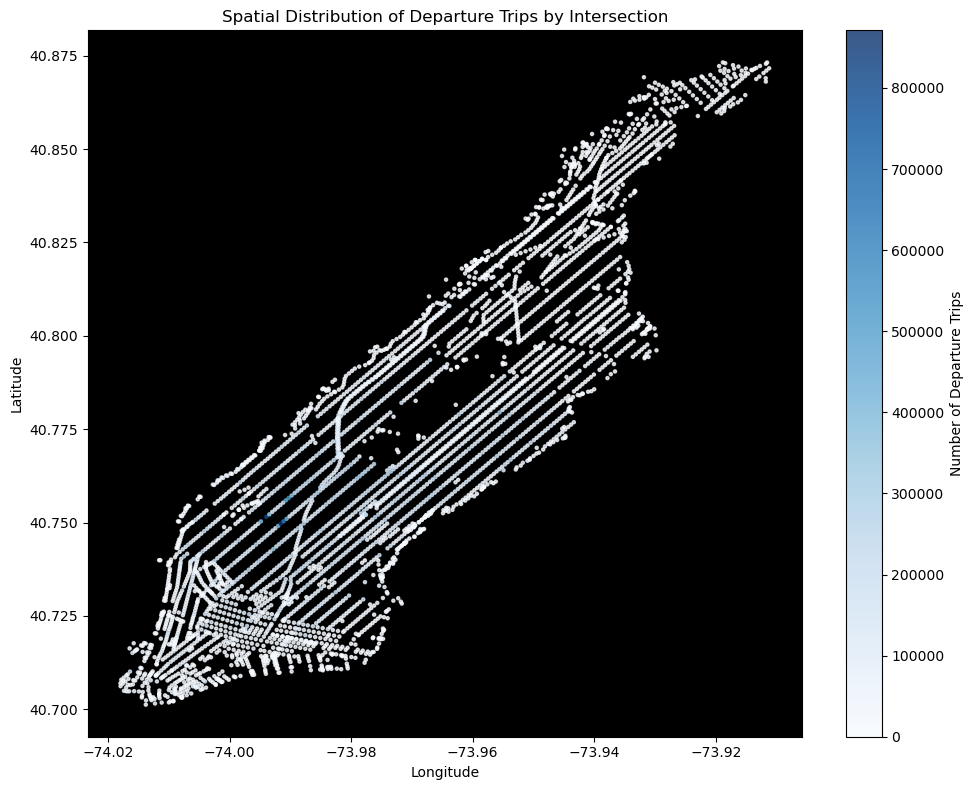

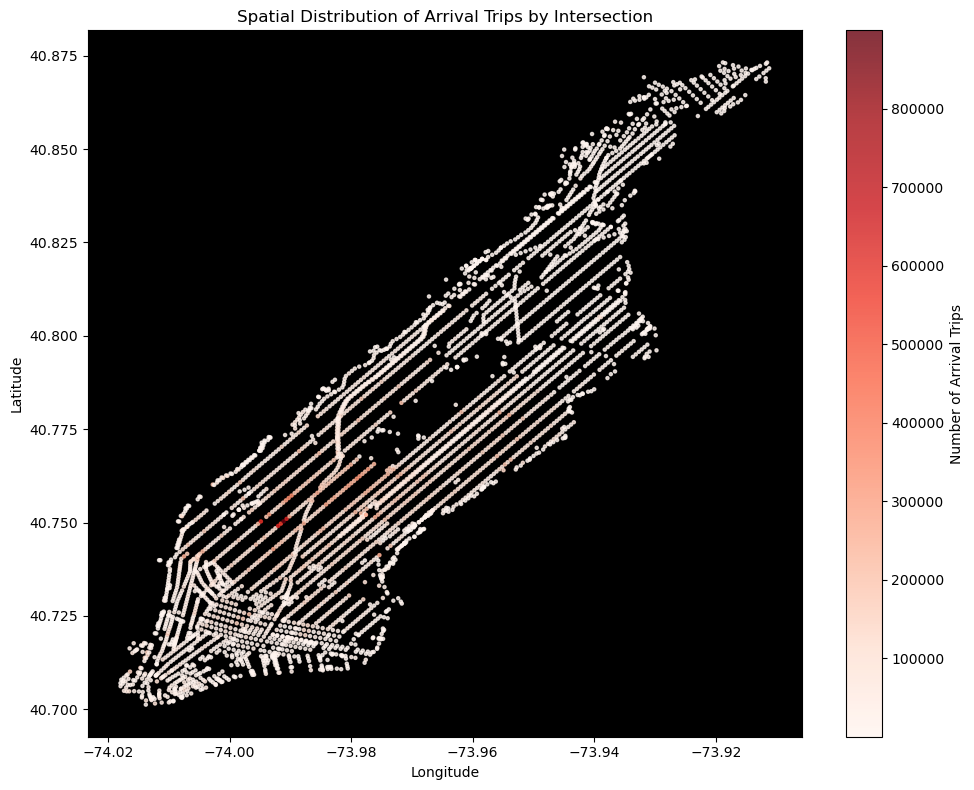

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
taxi_columns = [
    "taxi_id", "pick_up_time", "drop_off_time", "pick_up_intersection", "drop_off_intersection"
]
taxi_df = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\taxi_id.csv.bz2',
    compression='bz2',
    header=None,
    names=taxi_columns
)
intersection_df = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\intersections.csv',
    header=None,
    names=['inter_id', 'lat', 'lon']
)

departure_counts = taxi_df['pick_up_intersection'].value_counts().rename('departures')
arrival_counts = taxi_df['drop_off_intersection'].value_counts().rename('arrivals')
map_df = intersection_df.set_index('inter_id').join(departure_counts).join(arrival_counts).fillna(0)

# Plot departures: only axis background black
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.set_facecolor('black')
sc = ax.scatter(map_df['lon'], map_df['lat'], c=map_df['departures'], cmap='Blues', s=5, alpha=0.8)
plt.colorbar(sc, label='Number of Departure Trips')
plt.title('Spatial Distribution of Departure Trips by Intersection')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot arrivals: only axis background black
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.set_facecolor('black')
sc = ax.scatter(map_df['lon'], map_df['lat'], c=map_df['arrivals'], cmap='Reds', s=5, alpha=0.8)
plt.colorbar(sc, label='Number of Arrival Trips')
plt.title('Spatial Distribution of Arrival Trips by Intersection')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(False)
plt.tight_layout()
plt.show()

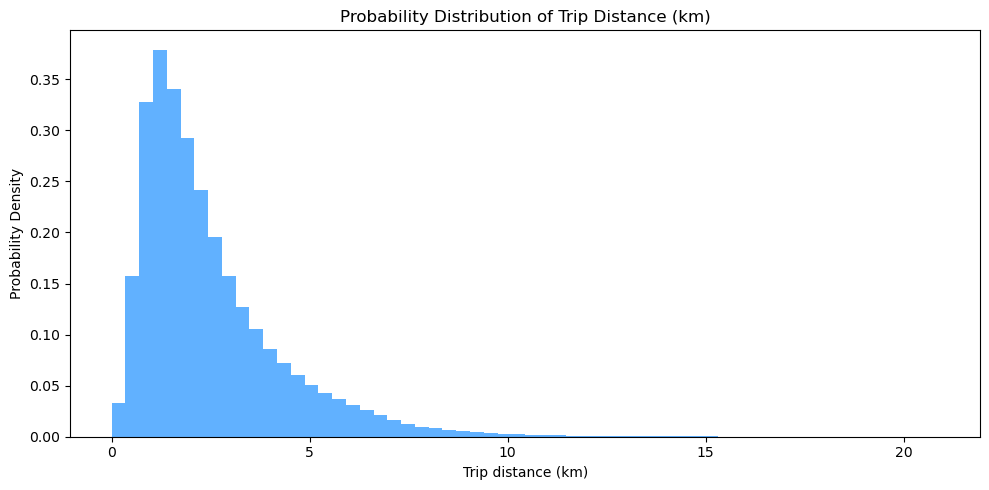

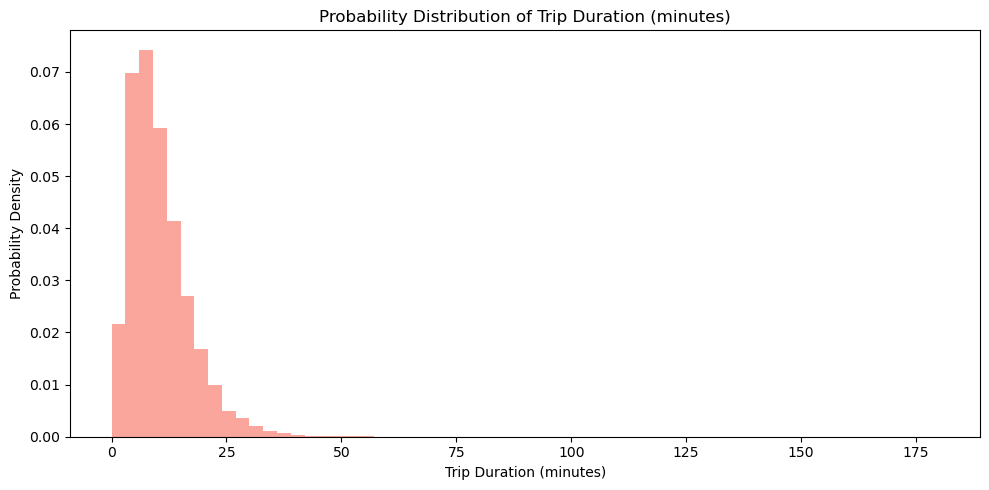

Trip Distance Statistics (km):
count    1.459528e+08
mean     1.044899e+00
std      2.022657e+00
min      2.758544e-04
25%      1.221906e+00
50%      1.970601e+00
75%      3.207925e+00
max      2.088579e+01
dtype: float64

Trip Duration Statistics (minutes):
count    1.459528e+08
mean     4.032341e+00
std      7.830931e+00
min      1.666667e-02
25%      6.000000e+00
50%      9.116667e+00
75%      1.400000e+01
max      1.799000e+02
dtype: float64


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setup
taxi_columns = [
    "taxi_id", "pick_up_time", "drop_off_time", "pick_up_intersection", "drop_off_intersection"
]
intersection_df = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\intersections.csv',
    header=None,
    names=['inter_id', 'lat', 'lon']
)
intersection_df = intersection_df.drop_duplicates(subset='inter_id')
intersection_df = intersection_df.set_index('inter_id')

# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2-lat1, lon2-lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    return 2*R*np.arcsin(np.sqrt(a))

# Initialize lists to collect results
distance_list = []
duration_list = []

# Process the trip file in chunks
chunk_iter = pd.read_csv(
    r'C:\Users\justi\Downloads\CE634\CE634\taxi_id.csv.bz2',
    compression='bz2',
    header=None,
    names=taxi_columns,
    chunksize=500000  # adjust as needed for your RAM
)

for chunk in chunk_iter:
    # Filter for valid ID matches early (avoids .loc errors)
    valid_pickup = chunk['pick_up_intersection'].isin(intersection_df.index)
    valid_dropoff = chunk['drop_off_intersection'].isin(intersection_df.index)
    chunk = chunk[valid_pickup & valid_dropoff]
    # Get coordinates
    pcoords = intersection_df.loc[chunk['pick_up_intersection']].reset_index(drop=True)
    dcoords = intersection_df.loc[chunk['drop_off_intersection']].reset_index(drop=True)
    # Duration (minutes)
    chunk['trip_duration'] = (chunk['drop_off_time'] - chunk['pick_up_time']) / 60
    # Row-wise haversine calculation
    dist = haversine(
        pcoords['lat'].values, pcoords['lon'].values,
        dcoords['lat'].values, dcoords['lon'].values
    )
    # Filtering
    valid = (chunk['trip_duration'] > 0) & (chunk['trip_duration'] < 180) & (dist > 0) & (dist < 50)
    distance_list.append(dist[valid].astype(np.float32))
    duration_list.append(chunk.loc[valid, 'trip_duration'].astype(np.float32).values)

# Collate final arrays
all_distances = np.concatenate(distance_list)
all_durations = np.concatenate(duration_list)

# Plot distributions
plt.figure(figsize=(10,5))
plt.hist(all_distances, bins=60, color='dodgerblue', density=True, alpha=0.7)
plt.title('Probability Distribution of Trip Distance (km)')
plt.xlabel('Trip distance (km)')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.hist(all_durations, bins=60, color='salmon', density=True, alpha=0.7)
plt.title('Probability Distribution of Trip Duration (minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()

# Stats
print("Trip Distance Statistics (km):")
print(pd.Series(all_distances).describe())
print("\nTrip Duration Statistics (minutes):")
print(pd.Series(all_durations).describe())